In [1]:
import pandas as pd
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1],
                     chr_int(data1[2]), data1[3],
                     chr_int(data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9], chr_int(data1[10]),
                     chr_int(data1[11]),
                     chr_int(data1[12]),
                     data1[13], data1[14]
                    ])


In [2]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [3]:
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt',
    'education', 'education_num', 'marital',
    'occupation', 'relationship', 'race',
    'sex', 'capital_gain', 'capital_loss',
    'hr_per_week', 'country', 'income'
]

In [4]:
df.shape

(32561, 15)

In [5]:
counts = df.groupby('country').size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [6]:
ml = df[(df.sex == 'Male')]


In [7]:
ml1 = df[(df.sex == "Male") & (df.income == '>50K\n')]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female') & (df.income == '>50K\n')]

In [8]:
df1 = df[(df.income=='>50K\n')]
print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.')
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [9]:
print('The average age of men is:', ml['age'].mean())
print('The average age of women is:', fm['age'].mean())
print('The average age of high-income men is:', ml1['age'].mean())
print('The average age of high-income women is:', fm1['age'].mean())


The average age of men is: 39.43354749885268
The average age of women is: 36.85823043357163
The average age of high-income men is: 44.62578805163614
The average age of high-income women is: 42.125530110262936


In [10]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()

print('Statistics of age for men: mu:', ml_mu, 'var:', ml_var, 'std:', ml_std)
print('Statistics of age for women: mu:', fm_mu, 'var:', fm_var, 'std:', fm_std)


Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


In [11]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print("Median age per men and women: ", ml_median, fm_median)

ml_median_age = ml1['age'].median()
fm_median_age = fm1['age'].median()
print("Median age per men and women with high-income: ", ml_median_age, fm_median_age)


Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


<Axes: >

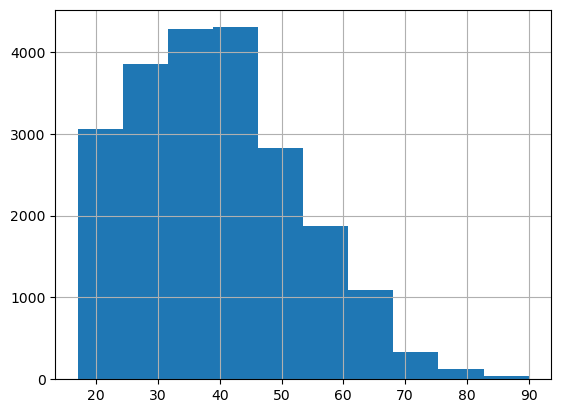

In [12]:
ml_age = ml['age']
ml_age.hist(density=False, histtype='stepfilled', bins=10)

<Axes: >

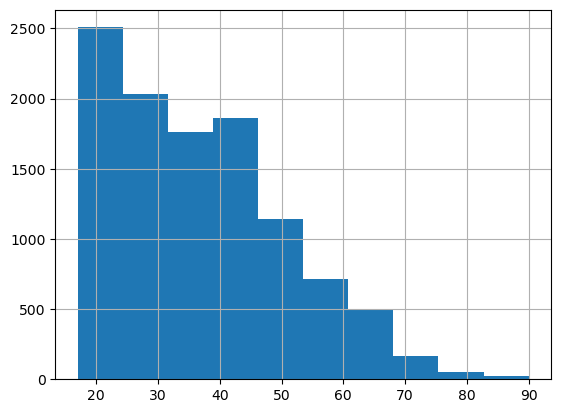

In [ ]:
fm_age = fm['age']
fm_age.hist(normed = 0, histtype = 'stepfilled', bins = 10)


<Axes: >

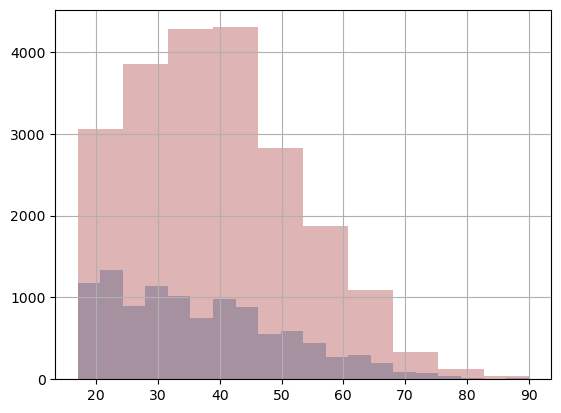

In [14]:
import seaborn as sns

# Histogram for women
fm_age.hist(density=False, histtype='stepfilled',
            alpha=0.5, bins=20)

# Histogram for men with color customization
ml_age.hist(density=False, histtype='stepfilled',
            alpha=0.5, bins=10,
            color=sns.desaturate("indianred", 0.75))


<Axes: >

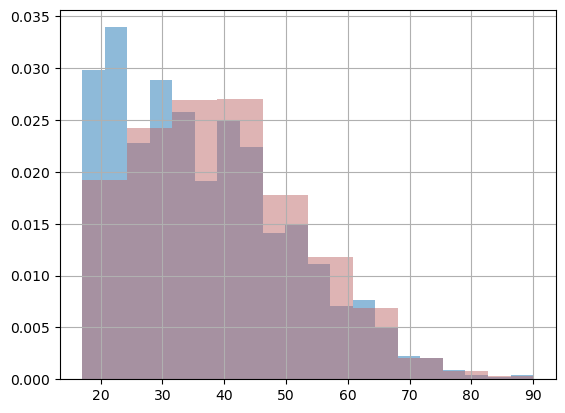

In [15]:
# PMF (Probability Mass Function = normalized histogram)
fm_age.hist(density=True, histtype='stepfilled',
            alpha=0.5, bins=20)

ml_age.hist(density=True, histtype='stepfilled',
            alpha=0.5, bins=10,
            color=sns.desaturate("indianred", 0.75))


<Axes: >

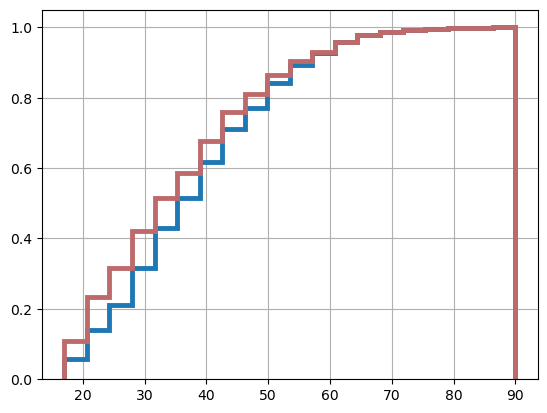

In [16]:
ml_age.hist(density=True, histtype='step',
            cumulative=True, linewidth=3.5,
            bins=20)

fm_age.hist(density=True, histtype='step',
            cumulative=True, linewidth=3.5,
            bins=20,
            color=sns.desaturate("indianred", 0.75))


In [17]:
# Remove outliers for income > 50K: keep only ages within median ± 15 years
df2 = df.drop(df.index[
    (df.income == '>50K\n') &
    ((df['age'] > df['age'].median() + 35) |
     (df['age'] < df['age'].median() - 15))
])

ml1_age = ml1['age']
fm1_age = fm1['age']

# Cleaned ages for men and women (high-income only, after outlier removal)
ml2_age = ml1_age.drop(ml1_age.index[
    (ml1_age > df['age'].median() + 35) |
    (ml1_age < df['age'].median() - 15)
])

fm2_age = fm1_age.drop(fm1_age.index[
    (fm1_age > df['age'].median() + 35) |
    (fm1_age < df['age'].median() - 15)
])


In [18]:
# Means and standard deviations
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()

mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

# Display stats
print("Men statistics:")
print("Mean:", mu2ml, "Std.:", std2ml)
print("Median:", md2ml)
print("Min:", ml2_age.min(), "Max:", ml2_age.max())

print("\nWomen statistics:")
print("Mean:", mu2fm, "Std.:", std2fm)
print("Median:", md2fm)
print("Min:", fm2_age.min(), "Max:", fm2_age.max())


Men statistics:
Mean: 44.325352326110014 Std.: 10.012302742491952
Median: 44.0
Min: 22 Max: 72

Women statistics:
Mean: 41.93236301369863 Std.: 9.989525648849213
Median: 41.0
Min: 22 Max: 72


<Axes: >

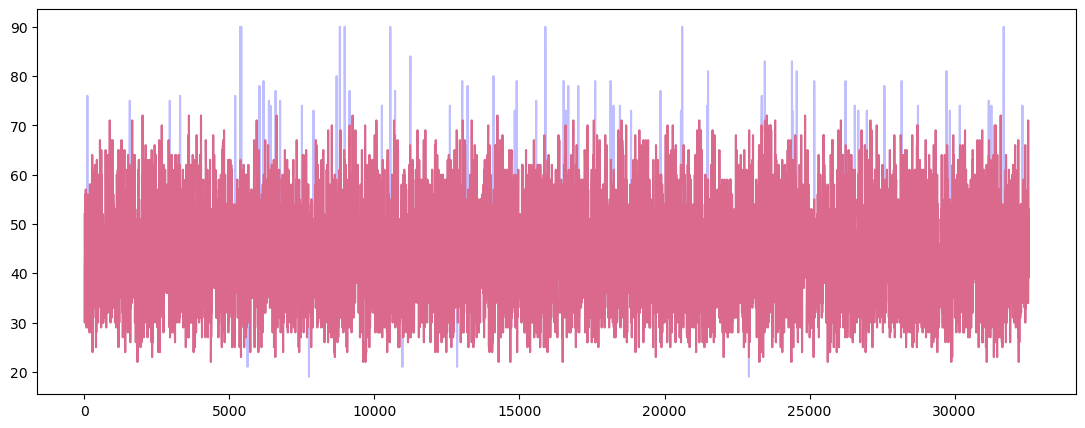

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.4, 5))

# Plot for all high-income individuals
df.age[(df.income == '>50K\n')].plot(alpha=0.25, color='blue')

# Plot after outlier removal
df2.age[(df2.income == '>50K\n')].plot(alpha=0.45, color='red')


In [20]:
# With outliers
print("The mean difference with outliers is: %4.2f" % (ml_age.mean() - fm_age.mean()))

# Without outliers
print("The mean difference without outliers is: %4.2f" % (ml2_age.mean() - fm2_age.mean()))


The mean difference with outliers is: 2.58
The mean difference without outliers is: 2.39


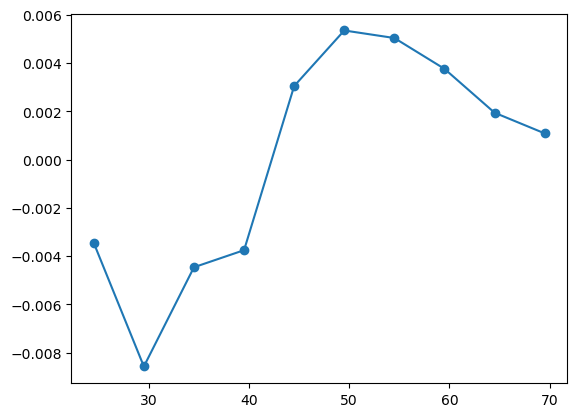

In [21]:
import numpy as np

countx, divisionx = np.histogram(ml2_age, density=True)
county, divisiony = np.histogram(fm2_age, density=True)
val = [(divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx - county, 'o-')


In [22]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i - m) * (i - m) * (i - m)
    res /= (len(x) * s * s * s)
    return res

print("Skewness of the male population = ", skewness(ml2_age))
print("Skewness of the female population = ", skewness(fm2_age))


Skewness of the male population =  0.2692767474998042
Skewness of the female population =  0.4021179824911583


In [23]:
def pearson(x):
    return 3 * (x.mean() - x.median()) / x.std()

print("Pearson's coefficient of the male population = ", pearson(ml2_age))
print("Pearson's coefficient of the female population = ", pearson(fm2_age))


Pearson's coefficient of the male population =  0.09748576360837374
Pearson's coefficient of the female population =  0.28000218823384304


In [24]:
x1 = np.random.normal(-1., 0.5, 15)
x2 = np.random.normal(6., 1., 10)
y = np.r_[x1, x2]
x = np.linspace(min(y), max(y), 100)
s = 0.4
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:', alpha=0.3)
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms=10)
plt.show()


NameError: name 'norm' is not defined

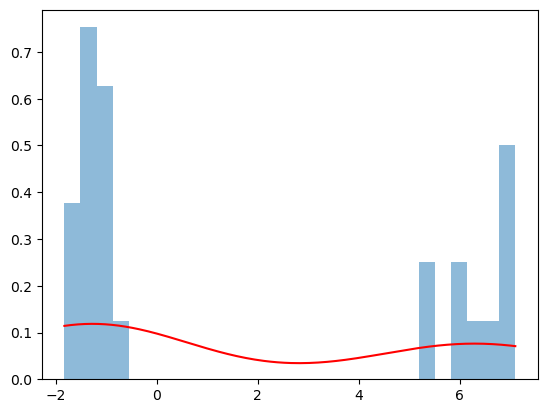

In [ ]:
from scipy.stats import gaussian_kde

density = gaussian_kde(y)
xgrid = np.linspace(y.min(), y.max(), 200)
plt.hist(y, bins=28, density=True, alpha=0.5)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()


In [ ]:
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000

for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean() - mu) ** 2

print('MSE: ', err / NTs)


MSE:  0.0010638123806331252
